# Predictive Modeling Project
## Using a logistic model on California Local Educational Agency (LEA) data to predict which locations are more likely to have a school closed
#### Demonstrating skills in data analysis, predictive modeling, and data visualization.

### Definitions:
- **Local Educational Agency (LEA):** An LEA is a local entity involved in education including but not limited to school districts, county offices of education, direct-funded charter schools, and special education local plan area (SELPA).
- **Title 1:** Federal education program that supports low income students throughout the nation. Funds are distributed to high poverty schools, as determined by the number of students who qualify for free or reduced lunch. https://www.cde.ca.gov/sp/sw/#:~:text=Helps%20disadvantaged%20students%20meet%20state,Student%20Succeeds%20Act%20(ESSA). 


### Purpose of project:
Through my experience with AmeriCorps Reading Partners Silicon Valley, I learned about the daily reality of teachers, students and staff at a California public school post-pandemic. I was happy to see similarities to my elementary school years, but I was also very surprised to see the dramatic effect that COVID-19 had on school processes, staff retention, and student outcomes. I served as the onsite Program Coordinator for our literacy program so I was able to work closely with volunteers, teachers, and staff to develop tutoring schedules for their students. I learned that many students were far behind the reading level for their grade, there were serious shortages of teachers, and students frequently enrolled and transferred schools due to school closures or family circumstances. I also learned that some teachers must teach 2 different grade-levels in the same class due to lack of instructors. Many students were in need of individualized literacy support, but unfortunately, our program and current teaching staff are unable to effectively meet the needs of all students. Our program specifically functions at Title 1 elementary schools where most students' families experience financial hardship. I've attended title 1 schools K-12 in Whitter, CA, so I felt a strong desire to support the program's efforts and understand students' experiences now. Based on the definition of a title 1 school, most title 1 schools are located in areas where there are predominantly low income families/know that districts are located in neighborhoods with reported low incomes. 

With this information, I would like to know if there is a relationship between a school's location and their operation status. There are 6 possible statuses presented in this data: 1-Open, 2-Closed, 3-New, 4-Added, 5-Changed Boundary/Agency, 6-Inactive, 7-Future, 8-Reopened. Through predictive modeling using a logistic regression model, I would like to understand if a school's location is predictive of it being closed or inactive. I will be focusing on California schools to reduce the project's scope.

### How findings may be used:
To pinpoint LEAs that are in need of more resources, like teaching staff, due to more closures in their area. To understand how neighboring LEAs within the same city compare to one another. If this could help administrators/decision-makers determine which areas may experience more closures, it could help in allocating funds and resources to these regions or planning. Help decision makers determine best course of action for distributing funds and resources.

### Dataset used:

**Dataset 1: Information on the Common Core of Data (CCD), Local Education Agency (School District) Universe Survey Data, (v.1a), nonfiscal year 2022-2023**

https://nces.ed.gov/admindata/ 

- The primary purpose of the CCD is to provide basic information on public elementary and secondary schools, local education agencies (LEAs), and state education agencies (SEAs) for each state, the District of Columbia, and the outlying territories with a U.S. relationship. (https://nces.ed.gov/ccd/files.asp#Fiscal:2,LevelId:5,SchoolYearId:37,Page:1)
- Gives us the main information, like location, name and status. 
- Will be our primary dataset.
- Important definitions for dataset variables: 
    - https://nces.ed.gov/ccd/commonfiles/glossary.asp 
    - https://ceds.ed.gov/element/000537/#RegularNotInSupervisoryUnion 

**Dataset 2: Public School District Geocode File for 2022-2023**

https://nces.ed.gov/programs/edge/Geographic/SchoolLocations

- The National Center for Education Statistics (NCES) Education Demographic and Geographic Estimates
(EDGE) program develops data resources and information to help data users investigate the social and
spatial context of education. School point locations (latitude/longitude values) are a key component of
the NCES data collection. These data are needed to address a variety of spatially-oriented tasks and
research questions. They provide information needed to construct NCES school-based surveys; they
provide indicators needed to help determine program eligibility; and they provide the foundation for
determining geographic associations with other types of entities. (https://nces.ed.gov/programs/edge/docs/EDGE_GEOCODE_PUBLIC_FILEDOC.pdf)
- Can tell us school location, their size, and if it's located in suburban, town, rural, or city areas.
- Will be our secondary dataset.

**Dataset 3: School Neighborhood Poverty Estimates for 2021-2022**

https://nces.ed.gov/programs/edge/Economic/NeighborhoodPoverty 

- The National Center for Education Statistics (NCES) Education Demographic and Geographic Estimates
(EDGE) program developed the spatially interpolated demographic and economic (SIDE) estimates to
extract new value from existing sources of poverty data. SIDE uses geographic and statistical modeling to
provide estimates of neighborhood poverty around specific geographic locations (Geverdt and Nixon,
2018).
The estimates provided in the School Neighborhood Poverty Estimates (SNP) files reflect economic
conditions of neighborhoods where schools are physically located. They are not designed to reflect the
economic conditions of the students who are enrolled in particular schools. Economic conditions of the
students inside a school may vary considerably from the neighborhood conditions around a school. For
example, for small elementary schools that limit enrollment to a local neighborhood, the economic
conditions of the school neighborhood may be similar to the conditions for students enrolled in the school.
Conversely, in cases where a school draws students from multiple neighborhoods – as often occurs with
larger schools, schools that serve secondary grade levels, specialty schools, and schools that operate open
enrollment plans – the economic conditions of the school neighborhood may be quite different from the
conditions of neighborhoods where students live.
The primary role of schools is to educate children, but schools can also be important neighborhood
institutions, whose physical facilities are used for cultural events, emergency shelters, polling stations, and
other types of public engagement. The level of investment in school facilities, and the potential closing or
opening of local schools, can have significant implications for surrounding neighborhoods. Additionally,
neighborhood residents may provide considerable support and advocacy for the care of local school
facilities, particularly when they also serve as important neighborhood amenities. Schools are geographic
places as well as institutions for learning, and the SNP files provide an indicator of the economic landscape
around these locations. (https://nces.ed.gov/programs/edge/docs/EDGE_SIDE_PUBSCH_FILEDOC.pdf)
- This is not the same school year as our other datasets, so it will be used to understand historical economic landscape of the school district's surrounding neighborhoods.
- It's at a school level, not district.


### Primary key and scope:

**Primary Key: LEAID**

**Scope: Focus only on LEAs in California, focus only on public schools**
- NCES Agency Identification Number is unique to each LEA and independent of state. This will be the key we join both tables on. 
- The first dataset has LEA_TYPE (code) which tells us if it is a public school or not, but there are various types of categories.
- best way to do this would be to limit the dataset 1 to only the values for CA in dataset 2 since we know dataset 2 only has public school data
- this would be right joining dataset 1 x dataset 2, keeping all values in left table that match values in right table

### visualization ideas:
- map with locations with school status at start, map with school status change, map with predictive modeling, zones most likely o close

- overlay with map of areas poverty levels:



### Variables Descriptions for Datasets 1 and 2

https://nces.ed.gov/ccd/commonfiles/glossary.asp 


### Step 1: Import necessary modeules/packages and Primary Dataset

In [2]:
import numpy as np
import pandas as pd
import random
# Set display options
pd.set_option('display.max_rows', None)

In [3]:
lea = pd.read_csv("/Users/emilylopez/Desktop/github/datasci_practice_projects/predictive_modeling/LEA_directory_data/LEA_directory.csv")
lea.head(5)

/var/folders/w4/mykv87ns3h3blj3jw28kzwd80000gn/T/ipykernel_769/580687593.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  lea = pd.read_csv("/Users/emilylopez/Desktop/github/datasci_practice_projects/predictive_modeling/LEA_directory_data/LEA_directory.csv")


,SCHOOL_YEAR,FIPST,STATENAME,ST,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,MSTREET1,...,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,OPERATIONAL_SCHOOLS
0,2022-2023,1,ALABAMA,AL,Alabama Youth Services,1,NaN,AL-210,100002,1000 Industrial School Road,...,Yes,Yes,No,No,No,KG,12,Other,As reported,0
1,2022-2023,1,ALABAMA,AL,Albertville City,1,NaN,AL-101,100005,8379 US Highway 431,...,Yes,Yes,No,No,No,PK,12,Other,As reported,6
2,2022-2023,1,ALABAMA,AL,Marshall County,1,NaN,AL-048,100006,12380 US Highway 431 S,...,Yes,Yes,No,No,No,PK,12,Other,As reported,15
3,2022-2023,1,ALABAMA,AL,Hoover City,1,NaN,AL-158,100007,2810 Metropolitan Way,...,Yes,Yes,No,No,No,PK,12,Other,As reported,18
4,2022-2023,1,ALABAMA,AL,Madison City,1,NaN,AL-169,100008,211 Celtic Dr,...,Yes,Yes,No,No,No,PK,12,Other,As reported,11


### Step 2: Sanity Check
It's important to sanity-check your data before begining your analysis to ensure the data you're working with is accurate, complete, has good quality, and is consistent with what you expect you'll require to do your analysis. This sanity-check step will inform your data cleaning, like what columns or rows to drop, how to handle missing values, what variable types you may need to change, how to manage your variables (split, combine variables for example). Results could also inform your analysis. If you don't sanity-check, your results and insights may be skewed, incorrect or incomplete, so any decisions made using your analysis results will be faulty.

It is important to check for issues in any variable you could use as the primary key. You should also check the variables you know you will be using in your analysis to make sure their values fall within the scope of your analysis. For example, if you're research focuses on California and you have a state variable in your dataset, you should check that variable to ensure you only have/keep California values.

**Sanity Check steps:**
1. use .shape to make sure the number of rows and columns aligns with what I expect.
2. use .columns to make sure all the columns from the data documentation are included in the dataframe
3. use .head() to get a preview of the pd dataframe and check if the indices, column names/variables, and values look like I would expect them to look like
4. use .dtypes to check the datatypes of the variables
5. use .info(verbose =True) to see if there are any missing values (null/nan) by checking the non-null count
6. use .describe() to qualitative or quantitative descriptive stats 
7. check for data quality by making sure the values for each variable align with what I expect, such as by looking at the unique values (.unique()), counting duplicates (.duplicated(keep=False)), and making sure the relationships between the variables look like how I expect them to (using .value_counts() for example). 



In [4]:
print(f'The dataframe shape: {lea.shape}')

The dataframe shape: (19714, 58)


In [5]:
print(f'there are {len(lea.columns)} variables', '\n')
print(lea.columns)

there are 58 variables 

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'LEA_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'MSTREET1', 'MSTREET2',
       'MSTREET3', 'MCITY', 'MSTATE', 'MZIP', 'MZIP4', 'LSTREET1', 'LSTREET2',
       'LSTREET3', 'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'PHONE', 'WEBSITE',
       'SY_STATUS', 'SY_STATUS_TEXT', 'UPDATED_STATUS', 'UPDATED_STATUS_TEXT',
       'EFFECTIVE_DATE', 'LEA_TYPE', 'LEA_TYPE_TEXT', 'OUT_OF_STATE_FLAG',
       'CHARTER_LEA', 'CHARTER_LEA_TEXT', 'NOGRADES', 'G_PK_OFFERED',
       'G_KG_OFFERED', 'G_1_OFFERED', 'G_2_OFFERED', 'G_3_OFFERED',
       'G_4_OFFERED', 'G_5_OFFERED', 'G_6_OFFERED', 'G_7_OFFERED',
       'G_8_OFFERED', 'G_9_OFFERED', 'G_10_OFFERED', 'G_11_OFFERED',
       'G_12_OFFERED', 'G_13_OFFERED', 'G_UG_OFFERED', 'G_AE_OFFERED', 'GSLO',
       'GSHI', 'LEVEL', 'IGOFFERED', 'OPERATIONAL_SCHOOLS'],
      dtype='object')


In [6]:
lea.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19714 entries, 0 to 19713
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SCHOOL_YEAR          19714 non-null  object 
 1   FIPST                19714 non-null  int64  
 2   STATENAME            19714 non-null  object 
 3   ST                   19714 non-null  object 
 4   LEA_NAME             19714 non-null  object 
 5   STATE_AGENCY_NO      19714 non-null  int64  
 6   UNION                388 non-null    float64
 7   ST_LEAID             19714 non-null  object 
 8   LEAID                19714 non-null  int64  
 9   MSTREET1             19714 non-null  object 
 10  MSTREET2             835 non-null    object 
 11  MSTREET3             6 non-null      object 
 12  MCITY                19714 non-null  object 
 13  MSTATE               19714 non-null  object 
 14  MZIP                 19714 non-null  int64  
 15  MZIP4                12320 non-null 

In [7]:
# CHECK TO MAKE SURE THESE ALL MATCH EACH OTHER CORRECTLY
# The output shows that FIPST, STATENAME, ST are consistent with each other
ca = lea[lea["ST"] == "CA"][["FIPST","STATENAME","ST"]] 
ca.value_counts()

FIPST  STATENAME   ST
6      CALIFORNIA  CA    2144
Name: count, dtype: int64

In [8]:
# check to make sure there is only the same survey year
# This output shows that we only have one unique year
lea["SCHOOL_YEAR"].value_counts()

SCHOOL_YEAR
2022-2023    19714
Name: count, dtype: int64

#### Observations so far
Everything looks like we expect it to based on the documentation. The state name, id, and FIPST are all consistent, we only have data for 2022-2023, we don't have missing values for our state of interest.


### Repeat Steps 1 & 2 with Second Dataset


**Sanity Check steps:**
1. use .shape to make sure the number of rows and columns aligns with what I expect.
2. use .columns to make sure all the columns from the data documentation are included in the dataframe
3. use .head() to get a preview of the pd dataframe and check if the indices, column names/variables, and values look like I would expect them to look like
4. use .dtypes to check the datatypes of the variables
5. use .info(verbose =True) to see if there are any missing values (null/nan) by checking the non-null count
6. use .describe() to qualitative or quantitative descriptive stats 
7. check for data quality by making sure the values for each variable align with what I expect, such as by looking at the unique values (.unique()), counting duplicates (.duplicated(keep=False)), and making sure the relationships between the variables look like how I expect them to (using .value_counts() for example). 

In [9]:
geo = pd.read_csv("/Users/emilylopez/Desktop/github/datasci_practice_projects/predictive_modeling/EDGE_GEOCODE_LEA_data/LEA_locale.csv")
geo.head(5)

,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,PCT_CITY13,PCT_SUB21,PCT_SUB22,PCT_SUB23,PCT_TOWN31,PCT_TOWN32,PCT_TOWN33,PCT_RURAL41,PCT_RURAL42,PCT_RURAL43
0,100002,Alabama Youth Services,1,1000 Industrial School Road,Mt Meigs,AL,36057,1,1101,Montgomery County,...,-2.00,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.00,-2.00,-2.0
1,100005,Albertville City,1,8379 US Highway 431,Albertville,AL,35950,1,1095,Marshall County,...,0.00,0.0,0.0,0.0,0.0,100.0,0.0,0.00,0.00,0.0
2,100006,Marshall County,1,12380 US Highway 431 S,Guntersville,AL,35976,1,1095,Marshall County,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,17.11,82.89,0.0
3,100007,Hoover City,1,2810 Metropolitan Way,Hoover,AL,35243,1,1073,Jefferson County,...,91.68,0.0,0.0,0.0,0.0,0.0,0.0,8.32,0.00,0.0
4,100008,Madison City,1,211 Celtic Drive,Madison,AL,35758,1,1089,Madison County,...,0.00,100.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


In [10]:
# This dataframe has the same number of values/rows as the LEA set, which makes sense and implies we are not missing any district/lea data if there are no missing values
print(f'The dataframe shape: {geo.shape}')

The dataframe shape: (19714, 36)


In [11]:
print(f'there are {len(geo.columns)} variables', '\n')
print(geo.columns)

there are 36 variables 

Index(['LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE', 'ZIP', 'STFIP',
       'CNTY', 'NMCNTY', 'LAT', 'LON', 'CBSA', 'NMCBSA', 'CBSATYPE', 'CSA',
       'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL', 'SLDU', 'SCHOOLYEAR',
       'LOCALE', 'PCT_CITY11', 'PCT_CITY12', 'PCT_CITY13', 'PCT_SUB21',
       'PCT_SUB22', 'PCT_SUB23', 'PCT_TOWN31', 'PCT_TOWN32', 'PCT_TOWN33',
       'PCT_RURAL41', 'PCT_RURAL42', 'PCT_RURAL43'],
      dtype='object')


In [12]:
geo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19714 entries, 0 to 19713
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEAID        19714 non-null  int64  
 1   NAME         19714 non-null  object 
 2   OPSTFIPS     19714 non-null  int64  
 3   STREET       19714 non-null  object 
 4   CITY         19714 non-null  object 
 5   STATE        19714 non-null  object 
 6   ZIP          19714 non-null  int64  
 7   STFIP        19714 non-null  int64  
 8   CNTY         19714 non-null  int64  
 9   NMCNTY       19714 non-null  object 
 10  LAT          19714 non-null  float64
 11  LON          19714 non-null  float64
 12  CBSA         19714 non-null  object 
 13  NMCBSA       19714 non-null  object 
 14  CBSATYPE     19714 non-null  int64  
 15  CSA          19714 non-null  object 
 16  NMCSA        19714 non-null  object 
 17  NECTA        19714 non-null  object 
 18  NMNECTA      19714 non-null  object 
 19  CD  

#### Observations:
This dataframe has the same number of values/rows as the LEA set, which makes sense and implies we are not missing any district/lea data if there are no missing values.

Now we want to check the primary key LEAID to make sure it makes sense to join both tables on it. If not, lets check the NAME in geo and LEA_NAME in lea to see if it makes more sense to set that as the primary key. To be a primary key, the values in the column must uniquely identify each record. 

In [13]:
# This tells us each LEAID value in lea is unique. If there was an LEAID that appeared more than once, this would show a nonzero value
sum([1 if count > 1 else 0 for count in lea.LEAID.value_counts()])

0

In [14]:
sum([1 if count > 1 else 0 for count in geo.LEAID.value_counts()])

0

In [15]:
sum(lea.LEAID.isnull())

0

In [16]:
sum(geo.LEAID.isnull())

0

#### Observations:
The computations above tell us each LEAID value in lea and geo is unique. If there was an LEAID that appeared more than once, the computations above would give us a nonzero value. We also see that there are no null or missing values; therefore, it's safe to use LEAID as the primary key.

### Step 3: Data Transformation
#### Select only necessary variables for our analysis and merge


**I will pull out only the variables I think are relevant for my analysis.**

* **lea data:** I will need to know the school's id, school name, school location (state, city, zipcode), their start of year status, updated status, effective date of status update, the type of school/LEA it is, aggregate Number of Operational Schools associated with the LEA. We could also include additional information that may be useful in describing what we see, such as the grade levels the school serves, the LEA or school level. I would like to drop redundant columns: we know they all have the same school year/survey year and state identifiers that are not LEA location variable

* **geo data:** Keep the LEAID, the district (lea) name, city, state, zip, locale

In [17]:
print(f'geo df shape before dropping columns: {geo.shape}')
geo = geo[["LEAID", "NAME", "CITY", "STATE", "ZIP", "LOCALE"]]
print(f'geo df shape after dropping columns: {geo.shape}')
geo.head(3)

geo df shape before dropping columns: (19714, 36)
geo df shape after dropping columns: (19714, 6)


,LEAID,NAME,CITY,STATE,ZIP,LOCALE
0,100002,Alabama Youth Services,Mt Meigs,AL,36057,41
1,100005,Albertville City,Albertville,AL,35950,32
2,100006,Marshall County,Guntersville,AL,35976,42


In [18]:
print(f'lea df shape before dropping columns: {lea.shape}')
lea = lea[['LEAID', 'LEA_NAME', 'LCITY', 'LSTATE', 'LZIP', 'SY_STATUS', 'SY_STATUS_TEXT',\
            'UPDATED_STATUS', 'UPDATED_STATUS_TEXT', 'EFFECTIVE_DATE', 'LEA_TYPE',\
            'LEA_TYPE_TEXT', 'GSLO', 'GSHI', 'LEVEL', 'OPERATIONAL_SCHOOLS']]
print(f'lea df shape after dropping columns: {lea.shape}')
lea.head(3)

lea df shape before dropping columns: (19714, 58)
lea df shape after dropping columns: (19714, 16)


,LEAID,LEA_NAME,LCITY,LSTATE,LZIP,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,LEA_TYPE,LEA_TYPE_TEXT,GSLO,GSHI,LEVEL,OPERATIONAL_SCHOOLS
0,100002,Alabama Youth Services,Mt Meigs,AL,36057,1,Open,1,Open,8/30/23,1,Regular public school district that is not a c...,KG,12,Other,0
1,100005,Albertville City,Albertville,AL,35950,1,Open,1,Open,8/30/23,1,Regular public school district that is not a c...,PK,12,Other,6
2,100006,Marshall County,Guntersville,AL,35976,1,Open,1,Open,8/30/23,1,Regular public school district that is not a c...,PK,12,Other,15


**Scope: Focus only on LEAs in California, focus only on public schools**

- NCES Agency Identification Number is unique to each LEA and independent of state. This will be the key we join both tables on. 
- The first dataset has LEA_TYPE (code) which tells us if it is a public school or not, but there are various types of categories.
- best way to do this would be to limit the dataset 1 to only the values for CA in dataset 2 since we know dataset 2 only has public school data
- this would be right joining dataset 1 x dataset 2, keeping all values in left table that match values in right table



In [19]:
print(f'geo df shape before focusing only on CA: {geo.shape}')
geo_ca = geo[geo["STATE"] == 'CA']
print(f'geo df shape after focusing only on CA: {geo_ca.shape}')
geo_ca.head(3)

geo df shape before focusing only on CA: (19714, 6)
geo df shape after focusing only on CA: (2147, 6)


,LEAID,NAME,CITY,STATE,ZIP,LOCALE
1232,600001,Acton-Agua Dulce Unified,Acton,CA,93510,41
1233,600002,California School for the Blind (State Special...,Fremont,CA,94536,21
1234,600003,California School for the Deaf-Fremont (State ...,Fremont,CA,94538,21


In [20]:
print(f'lea df shape before focusing only on CA: {lea.shape}')
lea_ca = lea[lea["LSTATE"] == 'CA']
print(f'lea df shape after focusing only on CA: {lea_ca.shape}')
lea_ca.head(3)

lea df shape before focusing only on CA: (19714, 16)
lea df shape after focusing only on CA: (2147, 16)


,LEAID,LEA_NAME,LCITY,LSTATE,LZIP,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,LEA_TYPE,LEA_TYPE_TEXT,GSLO,GSHI,LEVEL,OPERATIONAL_SCHOOLS
1232,600001,Acton-Agua Dulce Unified,Acton,CA,93510,1,Open,1,Open,8/21/23,1,Regular public school district that is not a c...,KG,12,Other,3
1233,600002,California School for the Blind (State Special...,Fremont,CA,94536,1,Open,1,Open,8/21/23,5,State operated agency,KG,12,Other,1
1234,600003,California School for the Deaf-Fremont (State ...,Fremont,CA,94538,1,Open,1,Open,8/21/23,5,State operated agency,KG,12,Other,1


In [21]:
joined = lea_ca.join(geo_ca.set_index('LEAID'), on='LEAID')
print(f'new df shape: {joined.shape}')
joined.head()

new df shape: (2147, 21)


,LEAID,LEA_NAME,LCITY,LSTATE,LZIP,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,...,LEA_TYPE_TEXT,GSLO,GSHI,LEVEL,OPERATIONAL_SCHOOLS,NAME,CITY,STATE,ZIP,LOCALE
1232,600001,Acton-Agua Dulce Unified,Acton,CA,93510,1,Open,1,Open,8/21/23,...,Regular public school district that is not a c...,KG,12,Other,3,Acton-Agua Dulce Unified,Acton,CA,93510,41
1233,600002,California School for the Blind (State Special...,Fremont,CA,94536,1,Open,1,Open,8/21/23,...,State operated agency,KG,12,Other,1,California School for the Blind (State Special...,Fremont,CA,94536,21
1234,600003,California School for the Deaf-Fremont (State ...,Fremont,CA,94538,1,Open,1,Open,8/21/23,...,State operated agency,KG,12,Other,1,California School for the Deaf-Fremont (State ...,Fremont,CA,94538,21
1235,600006,Ross Valley Elementary,San Anselmo,CA,94960,1,Open,1,Open,8/21/23,...,Regular public school district that is not a c...,KG,8,Elementary,5,Ross Valley Elementary,San Anselmo,CA,94960,21
1236,600007,CA Sch for the Deaf-Riverside (State Special S...,Riverside,CA,92506,1,Open,1,Open,8/21/23,...,State operated agency,KG,12,Other,1,CA Sch for the Deaf-Riverside (State Special S...,Riverside,CA,92506,11


#### Observations

The new dataframe shape makes sense with what we observed in the dataframes after dropping columns and selecting CA LEAs. 

**Clean the new joined dataframe**
- I will see if there are any additional columns that may be redundant, rename columns, and ensure the variables' values are consistent with what we expect based on the data documentation.
    - Make sure both df names, state, cities, zips match. Since they were joined on LEAID, they should match
    - Make sure there are no missing values in any column
    - check what LEA type we have in our dataset
    - check what status types we have
    - check what grade levels we have
        - if applicable check lowest and highest level available at that site
    - check what locales we have

In [22]:
# Check to see if values in corresponding columns match
print(f"There are {np.sum([joined['LEA_NAME'] != joined['NAME']])} NAME values that do not match")
print(f"There are {np.sum([joined['LCITY'] != joined['CITY']])} CITY values that do not match")
print(f"There are {np.sum([joined['LSTATE'] != joined['STATE']])} STATE values that do not match")
print(f"There are {np.sum([joined['LZIP'] != joined['ZIP']])} ZIP values that do not match")

There are 0 NAME values that do not match
There are 0 CITY values that do not match
There are 0 STATE values that do not match
There are 0 ZIP values that do not match


In [23]:
# Check for missing values in each column
{col:np.sum(joined[col].isna()) for col in joined.columns}   

{'LEAID': 0,
 'LEA_NAME': 0,
 'LCITY': 0,
 'LSTATE': 0,
 'LZIP': 0,
 'SY_STATUS': 0,
 'SY_STATUS_TEXT': 0,
 'UPDATED_STATUS': 0,
 'UPDATED_STATUS_TEXT': 0,
 'EFFECTIVE_DATE': 0,
 'LEA_TYPE': 0,
 'LEA_TYPE_TEXT': 0,
 'GSLO': 0,
 'GSHI': 0,
 'LEVEL': 0,
 'OPERATIONAL_SCHOOLS': 0,
 'NAME': 0,
 'CITY': 0,
 'STATE': 0,
 'ZIP': 0,
 'LOCALE': 0}

#### Observations
We see that the name, state, city, zips in both tables match, there are no missing values in our columns. Therefore, we will drop duplicate columns. We can also clean up column names.

In [24]:
joined.columns

Index(['LEAID', 'LEA_NAME', 'LCITY', 'LSTATE', 'LZIP', 'SY_STATUS',
       'SY_STATUS_TEXT', 'UPDATED_STATUS', 'UPDATED_STATUS_TEXT',
       'EFFECTIVE_DATE', 'LEA_TYPE', 'LEA_TYPE_TEXT', 'GSLO', 'GSHI', 'LEVEL',
       'OPERATIONAL_SCHOOLS', 'NAME', 'CITY', 'STATE', 'ZIP', 'LOCALE'],
      dtype='object')

In [25]:
print(f'joined df shape before dropping columns: {joined.shape}')
joined = joined.drop(columns=["LEA_NAME", "LCITY", "LSTATE", "LZIP"])
print(f'joined df shape after dropping columns: {joined.shape}')
joined.head()

joined df shape before dropping columns: (2147, 21)
joined df shape after dropping columns: (2147, 17)


,LEAID,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,LEA_TYPE,LEA_TYPE_TEXT,GSLO,GSHI,LEVEL,OPERATIONAL_SCHOOLS,NAME,CITY,STATE,ZIP,LOCALE
1232,600001,1,Open,1,Open,8/21/23,1,Regular public school district that is not a c...,KG,12,Other,3,Acton-Agua Dulce Unified,Acton,CA,93510,41
1233,600002,1,Open,1,Open,8/21/23,5,State operated agency,KG,12,Other,1,California School for the Blind (State Special...,Fremont,CA,94536,21
1234,600003,1,Open,1,Open,8/21/23,5,State operated agency,KG,12,Other,1,California School for the Deaf-Fremont (State ...,Fremont,CA,94538,21
1235,600006,1,Open,1,Open,8/21/23,1,Regular public school district that is not a c...,KG,8,Elementary,5,Ross Valley Elementary,San Anselmo,CA,94960,21
1236,600007,1,Open,1,Open,8/21/23,5,State operated agency,KG,12,Other,1,CA Sch for the Deaf-Riverside (State Special S...,Riverside,CA,92506,11


In [26]:
joined.columns

Index(['LEAID', 'SY_STATUS', 'SY_STATUS_TEXT', 'UPDATED_STATUS',
       'UPDATED_STATUS_TEXT', 'EFFECTIVE_DATE', 'LEA_TYPE', 'LEA_TYPE_TEXT',
       'GSLO', 'GSHI', 'LEVEL', 'OPERATIONAL_SCHOOLS', 'NAME', 'CITY', 'STATE',
       'ZIP', 'LOCALE'],
      dtype='object')

In [27]:
# reorder collumns in a logical format
joined = joined[['LEAID', 'NAME', 'CITY', 'ZIP','STATE', 'LOCALE',\
                'LEA_TYPE', 'LEA_TYPE_TEXT', 'SY_STATUS','SY_STATUS_TEXT',\
                'UPDATED_STATUS','UPDATED_STATUS_TEXT', 'EFFECTIVE_DATE',\
                'OPERATIONAL_SCHOOLS','GSLO', 'GSHI', 'LEVEL' ]]
joined.head()

,LEAID,NAME,CITY,ZIP,STATE,LOCALE,LEA_TYPE,LEA_TYPE_TEXT,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,OPERATIONAL_SCHOOLS,GSLO,GSHI,LEVEL
1232,600001,Acton-Agua Dulce Unified,Acton,93510,CA,41,1,Regular public school district that is not a c...,1,Open,1,Open,8/21/23,3,KG,12,Other
1233,600002,California School for the Blind (State Special...,Fremont,94536,CA,21,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other
1234,600003,California School for the Deaf-Fremont (State ...,Fremont,94538,CA,21,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other
1235,600006,Ross Valley Elementary,San Anselmo,94960,CA,21,1,Regular public school district that is not a c...,1,Open,1,Open,8/21/23,5,KG,8,Elementary
1236,600007,CA Sch for the Deaf-Riverside (State Special S...,Riverside,92506,CA,11,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other


In [28]:
# change confusing column variable names and make then lowercase for easier coding
joined = joined.rename(columns={"SY_STATUS":"START_STATUS", "SY_STATUS_TEXT": "START_STATUS_TEXT",\
        "GSLO":"LOWEST_GRADE_OFFERED", "GSHI": "HIGHEST_GRADE_OFFERED", "LEVEL": "LEA_LEVEL"})

columns = [col.lower() for col in joined.columns]
joined.columns = columns
joined.head()

,leaid,name,city,zip,state,locale,lea_type,lea_type_text,start_status,start_status_text,updated_status,updated_status_text,effective_date,operational_schools,lowest_grade_offered,highest_grade_offered,lea_level
1232,600001,Acton-Agua Dulce Unified,Acton,93510,CA,41,1,Regular public school district that is not a c...,1,Open,1,Open,8/21/23,3,KG,12,Other
1233,600002,California School for the Blind (State Special...,Fremont,94536,CA,21,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other
1234,600003,California School for the Deaf-Fremont (State ...,Fremont,94538,CA,21,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other
1235,600006,Ross Valley Elementary,San Anselmo,94960,CA,21,1,Regular public school district that is not a c...,1,Open,1,Open,8/21/23,5,KG,8,Elementary
1236,600007,CA Sch for the Deaf-Riverside (State Special S...,Riverside,92506,CA,11,5,State operated agency,1,Open,1,Open,8/21/23,1,KG,12,Other


### Step 4: Analysis of the subset data

In [29]:
joined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2147 entries, 1232 to 19702
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   leaid                  2147 non-null   int64 
 1   name                   2147 non-null   object
 2   city                   2147 non-null   object
 3   zip                    2147 non-null   int64 
 4   state                  2147 non-null   object
 5   locale                 2147 non-null   int64 
 6   lea_type               2147 non-null   int64 
 7   lea_type_text          2147 non-null   object
 8   start_status           2147 non-null   int64 
 9   start_status_text      2147 non-null   object
 10  updated_status         2147 non-null   int64 
 11  updated_status_text    2147 non-null   object
 12  effective_date         2147 non-null   object
 13  operational_schools    2147 non-null   int64 
 14  lowest_grade_offered   2147 non-null   object
 15  highest_grade_offered 

In [30]:
cols = ['start_status_text', 'updated_status_text', 'lea_type_text', 'lea_level', 'locale']

# create a function to use it later too
def values_in_cols(df, cols):
    for col in cols:
        print("Column name: ", col)
        print("# Unique values: ", len(np.unique(df[col])) )
        print(df[col].value_counts())
        print('---' * 50)

values_in_cols(joined,cols)

Column name:  start_status_text
# Unique values:  4
start_status_text
Open      2112
Closed      23
Future       7
New          5
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Column name:  updated_status_text
# Unique values:  4
updated_status_text
Open      2112
Closed      23
Future       7
New          5
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Column name:  lea_type_text
# Unique values:  7
lea_type_text
Independent charter district                                                     1025
Regular public school district that is not a component of a supervisory union     983
Specialized public school district                                                 64
Service agency                                                

#### Observations
The most common status by far is 'open' at 2112 followed by 'closed' at 23. The top 3 LEA Types are 'Independent charter district' with 1025 values, 'Regular public school district that is not a component of a supervisory union' with 983 values, 'Specialized public school district' with 64 values. This provides a description for the different LEA types: https://ceds.ed.gov/element/000537#:~:text=Regular%20public%20school%20district%20that%20is%20a%20component%20of%20a,component%20of%20a%20supervisory%20union. We see the top 3 levels are elementary with 850, other with 699 and high with 401. Middle school which follows high only has 105. The top 3 locales are 21 with 548, 11 with 519, and 41 with 203 values. 

It's interesting that the most popular level in California is "other" and the most popular LEA type in California is Independent charter district. I've done some research, but it is unclear what "other" may stand for. Generally, it is a LEA or School level that does not fall under the categories listed. My best understanding is based on this documentation (). "Other" may stand for "Other High School Completers" which they define as "a certificate of attendance or other certificate of completion awarded in lieu of a diploma. Not included are equivalency diplomas, such as the GED or the HSED. Recipients of equivalency diplomas, such as a GED or HSED, are excluded from this survey." They define high school completers as: "students who received a high school diploma. A formal document certifying the successful completion of a prescribed
secondary school program of studies is required for the student to receive their high school diploma. Included here are regular high school diplomas differentiated by type, such as an academic diploma, a general diploma, or a vocational diploma."(https://www2.ed.gov/about/inits/ed/edfacts/emaps-ccd-grades-offered-and-completers-user-guide.pdf) This requires more research to understand why and understand what they mean. 

It was also interesting to see that the majority of the LEAs are within Large Suburbs (21) and Large Cities (11) since these make sense with my understanding of CA geography.  

It was positive to see the majority of the LEAs in California are open. 

**Definitions:**

https://nces.ed.gov/ccd/reference_library.asp

- **Independent charter district:** An independent charter school is a charter school within an LEA or other separately reported entity where all associated schools are public charter schools. (National Public Education Financial Survey (NPEFS) 2022-2024: Common Core of Data (CCD))

<figure>
    <img src="status.png" width="500" height="400"
         alt="A table with the 8 status codes, their name, and definition">
    <figcaption>A table with the 8 status codes, their name, and definition.</figcaption>
</figure>

<figure>
    <img src="levels.png" width="850" height="300"
         alt="A table with the definition for LEVEL variable and different level types.">
    <figcaption>A table with the definition for LEVEL variable and different level types</figcaption>
</figure>



<figure>
    <img src="type.png" width="1200" height="600"
         alt="A table with the 8 district types, their name, and definition">
    <figcaption>A table with the 8 district types, their name, and definition.</figcaption>
</figure>

<figure>
    <img src="locale.png" width="500" height="700"
         alt="A table with 12 locale types, their name, and definition">
    <figcaption>A table with 12 locale types, their name, and definition.</figcaption>
</figure>




### Step 5: Predictive modeling

My initial approach was to use a logistic regression model to understand what factors may be predictive of whether or not a school site will be open or closed. The start_status variable was supposed to be the dependent variable with two outcomes, open or closed. However, based on this insight from the new dataframe, I see that the status variable is highly imbalanced with 2112 Open sites and 23 Closed sites. This could result in:
- Model Bias: The model might become biased towards the majority class, making it less sensitive to the minority class.
- Poor Generalization: The model might fail to generalize well to new data, especially for the minority class.
- Metric Misleading: Common evaluation metrics like accuracy can be misleading, as the model might predict the majority class most of the time.

Therefore, I will explore the use of ensemble models to better handle imbalance, like **Boostrap Aggregation/Bagging** and **Random Forest** which are commonly used when working with unbalanced data, like with health datasets. Specifically, I will use **Bagging With Random Undersampling**  and **Random Forest With Class Weighting** ensemble models and **stratified train-test split** to evaluate them. ((https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/))

### Step 5.1: Data pre-processing

Before using modeling, we must convert all categorinal variables to numerical values and remove categorical variables that won't be useful for predicting. 

**Columns to keep:** our dataframe already has numeric versions of some of our categorical values of interest which we can use, like lea_type, start_status and updated_status. We can also keep leaid, zip, locale, and operational_schools.

**Columns to drop:** we can drop name, city and state since we know all our values are in CA and we have zip which we can use for location. We can also drop lea_type_text, start_status_text and updated_Status_text since we have numeric versions of those. We can drop effective_date since the majority of schools (2144) are date 8/21/23 which wont be helpful for prediction. 

**Columns to one-hot-encode:** lea_level, lowest_grade_offered and highest_grade_offered may be useful in our prediction so we can encode these to numeric values.

**Records/Samples to drop:** Updated and Start Status can have any of the options listed. However, Since we see in our value counts that the majority of the values are "Open" with a count of 2112, we will limit the records so we get accurate predictions. We will keep only Open and Closed (has 23 values). The other two values in our dataframe are future and new but each have less than 10 values.
```Markdown
    1-Open
    2-Closed
    3-New
    7-Future
```


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Drop cols that we wont use to train our model
print("df shape before col drop: ", joined.shape)
joined = joined.drop(columns=['name', 'city', 'state', 'lea_type_text', 'start_status_text', 'updated_status_text', 'effective_date', ])
print("df shape before col drop: ", joined.shape)
joined.head(2)


df shape before col drop:  (2147, 17)
df shape before col drop:  (2147, 10)


,leaid,zip,locale,lea_type,start_status,updated_status,operational_schools,lowest_grade_offered,highest_grade_offered,lea_level
1232,600001,93510,41,1,1,1,3,KG,12,Other
1233,600002,94536,21,5,1,1,1,KG,12,Other


In [33]:
# check what values to one-hot encode for our variables
cols = ["lea_level", "lowest_grade_offered", "highest_grade_offered"]
values_in_cols(joined,cols)

Column name:  lea_level
# Unique values:  7
lea_level
Elementary         850
Other              699
High               401
Middle             105
Not applicable      61
Not reported        30
Adult Education      1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Column name:  lowest_grade_offered
# Unique values:  16
lowest_grade_offered
KG    1538
9      261
6      136
N       61
7       46
5       33
M       30
10      19
11       5
1        5
4        4
8        3
12       2
3        2
AE       1
PK       1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Column name:  highest_grade_offered
# Unique values:  15
highest_grade_offered
12    1097
8      751
5       99
6       82
N       61
M       30
4       14
10       3
7        2


In [34]:
# one hot encode lea_level
lea_level_dict = {'Elementary': 0,
                  'Middle': 1,
                  'High': 2,
                  'Adult Education': 3,
                  'Other': 4,
                  'Not applicable': 5,
                  'Not reported': 6}
joined['lea_level_ordinal'] = joined.lea_level.map(lea_level_dict)
joined.head(3)

,leaid,zip,locale,lea_type,start_status,updated_status,operational_schools,lowest_grade_offered,highest_grade_offered,lea_level,lea_level_ordinal
1232,600001,93510,41,1,1,1,3,KG,12,Other,4
1233,600002,94536,21,5,1,1,1,KG,12,Other,4
1234,600003,94538,21,5,1,1,1,KG,12,Other,4


Based on documentation, the different grade levels are abbreviated in the following format:
```Markdown
    01—Grade 1
    02—Grade 2
    03—Grade 3
    04—Grade 4
    05—Grade 5
    06—Grade 6
    07—Grade 7
    08—Grade 8
    09—Grade 9
    10—Grade 10
    11—Grade 11
    12—Grade 12
    13—Grade 13
    AE—Adult Education
    KG—Kindergarten
    N—Grade not applicable
    PK—Prekindergarten
    UG—Ungraded
    M—Grade missing
```
Therefore, I will one hot enode the grade offered variaables 1 - 13 for the 'Grade' and assign the abbreviations numbers: 
- KG: 0
- AE: 14
- PK: 15
- N: 16
- UG: 17
- M: 18

In [35]:
# create function to one-hot encode the grades offered
def one_hot(df, cols):
    for col in cols:
        new_vals = {}
        vals = np.unique(df[col])
        for val in vals:
            if val == 'KG':
                new_vals[val] = 0
            elif val == 'AE':
                new_vals[val] = 14
            elif val == 'PK':
                new_vals[val] = 15
            elif val == 'N':
                new_vals[val] = 16
            elif val == 'UG':
                new_vals[val] = 17
            elif val == 'M':
                new_vals[val] = 18
            else:
                new_vals[val] = val
        df[col + '_ordinal'] = df[col].map(new_vals)
    return df

cols = ["lowest_grade_offered", "highest_grade_offered"]
one_hot(joined, cols)
joined.head()

,leaid,zip,locale,lea_type,start_status,updated_status,operational_schools,lowest_grade_offered,highest_grade_offered,lea_level,lea_level_ordinal,lowest_grade_offered_ordinal,highest_grade_offered_ordinal
1232,600001,93510,41,1,1,1,3,KG,12,Other,4,0,12
1233,600002,94536,21,5,1,1,1,KG,12,Other,4,0,12
1234,600003,94538,21,5,1,1,1,KG,12,Other,4,0,12
1235,600006,94960,21,1,1,1,5,KG,8,Elementary,0,0,8
1236,600007,92506,11,5,1,1,1,KG,12,Other,4,0,12


In [36]:
# Drop the categorical columns of thew new ordinal cols we made
cols = ["lea_level", "lowest_grade_offered", "highest_grade_offered"]
joined = joined.drop(columns=cols)
print('Final df shape: ', joined.shape)
joined.head()

Final df shape:  (2147, 10)


,leaid,zip,locale,lea_type,start_status,updated_status,operational_schools,lea_level_ordinal,lowest_grade_offered_ordinal,highest_grade_offered_ordinal
1232,600001,93510,41,1,1,1,3,4,0,12
1233,600002,94536,21,5,1,1,1,4,0,12
1234,600003,94538,21,5,1,1,1,4,0,12
1235,600006,94960,21,1,1,1,5,0,0,8
1236,600007,92506,11,5,1,1,1,4,0,12


In [37]:
# Drop all records that are not Open or Closed for status (start and updated)
joined = joined.drop(joined[(joined['start_status'].isin([3,7])) &  (joined['updated_status'].isin([3,7]))].index)

values_in_cols(joined, ["start_status", "updated_status"])

Column name:  start_status
# Unique values:  2
start_status
1    2112
2      23
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Column name:  updated_status
# Unique values:  2
updated_status
1    2112
2      23
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------


Now we split the data for further processing. We select updated_status as our y and the remaining 10 columns are in our x as features.

In [38]:
# keep a copy of the original target value
safe_y = joined[['updated_status']]

# drop the target variable and set it as y 
y = joined['updated_status']

# set the remaining columns to x
x = joined.drop('updated_status', axis=1)

In [39]:
print('x df shape: ', x.shape)
print('y df shape: ', y.shape)
print('columns in x: ', list(x.columns))

x df shape:  (2135, 9)
y df shape:  (2135,)
columns in x:  ['leaid', 'zip', 'locale', 'lea_type', 'start_status', 'operational_schools', 'lea_level_ordinal', 'lowest_grade_offered_ordinal', 'highest_grade_offered_ordinal']


In [40]:
print(y.value_counts())
print('-----' * 10)
print(f"Class='Open' : {sum(y==1)}/{len(y)} ({sum(y==1)/len(y): .2f}%)")
print(f"Class='Closed' : {sum(y==2)}/{len(y)} ({sum(y==2)/len(y): .2f}%)")

updated_status
1    2112
2      23
Name: count, dtype: int64
--------------------------------------------------
Class='Open' : 2112/2135 ( 0.99%)
Class='Closed' : 23/2135 ( 0.01%)


#### Step 5.2: Ensemble Models for Imbalanced Data

**Problem:** We see that we less than 1% of the entire dataset is class "Closed". If we split the data randomly in k fold cross-validation, we would get many splits without a 'Closed' class present in the set. 

**Solution:** We will use modified versions of bagging and random forests to work with imbalanced data and use stratified train-test split to evaluate our models

- **Stratified Sampling:** 
    
    *We will split the dataset randomly but in a way to maintain the same class distribution in each subset with stratified sampling. With k-fold cross-validation and train-test split, we will make sure each fold/set preserves the imbalanced class distribution to match the distribution in the complete training dataset.*
     
    - We will use StratifiedKFold to split the data for k-fold cross-validation.
    - For train-test split, we will use train_test_split() with the argument "stratify" set to our target variable. The function will determine the desired class distribution and ensure that the train and test sets both have this distribution using that argument

- **Bagging With Random Undersampling Steps:**
    
    *Similar to standard bagging, but this approach helps us create a balanced dataset from our inbalanced dataset to use with our model. Creating this balanced dataset will resolve potential issues like model bias and poor generalization.*

    1. Bootstrap Sample: select random samples of a training dataset with replacement (a sample may contain zero, one or more copies of examples in the training dataset). However, when creating bootstrap samples, do data resampling to oversample the minority class or undersample the majority class (the imbalanced-learn library provides an implementation of UnderBagging, which is undersampling the majority class in the bootstrap)
    2. Fit a weak learner model on each data sample (decision tree models that don't prune/may overfit their training set slightly)
    3. Predictions from all of the fiit weak learners are aggregated to make a single prediction (combined and averaged)

- **Random Forests with Class Weighting:**
    
    *Like bagging, random forest involves selecting bootstrap samples from the training dataset and fitting a decision tree on each. The main difference is that all features (variables or columns) are not used; instead, a small, randomly selected subset of features (columns) is chosen for each bootstrap sample. This has the effect of de-correlating the decision trees (making them more independent), and in turn, improving the ensemble prediction.*
    1. set the "class_weight" argument on the RandomForestClassifier model to 'balanced' to automatically use the inverse weighting from the training dataset, giving focus to the minority class.

- **Random Forests with Stratefied Train-Test Sets:**
   
    *Normal random forests procedure*


https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/


#### Import necessary modules 

In [41]:
#! pip install -U scikit-learn
#! conda install -c conda-forge imbalanced-learn -y
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

#### Stratefied Sampling

In [42]:
# split into train/test sets with same class ratio by setting stratify to y and test_size to 0.5
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.5, random_state= 0, stratify=y)

# summarize
train_0, train_1 = len(trainy[trainy==1]), len(trainy[trainy==2])
test_0, test_1 = len(testy[testy==1]), len(testy[testy==2])
print('Train: 1(Open) = %d, 2(Closed) = %d' % (train_0, train_1))
print('Test: 1(Open) = %d, 2(Closed) =%d' % (test_0, test_1))

Train: 1(Open) = 1056, 2(Closed) = 11
Test: 1(Open) = 1056, 2(Closed) =12


In [43]:
# Verify the sets are not the same by comparing values in the same 
# column "start_status" from both sets

index = 0
max_len = len(testX) - 1
for val in trainX['start_status']:
    if val == testX['start_status'].iloc[index]:
        index += 1
    else:
        print('The train and test X sets do not match.')
        break

The train and test X sets do not match.


#### Bagging with Random Undersampling

In [44]:
# Using repeated stratefied k fold to evaluate model

# define model
model_bc = BaggingClassifier() #**bc_params

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model_bc, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 1.000


#### Bagging with Straified Train-Test Set and Class Weights

In [61]:
from sklearn.utils.class_weight import compute_sample_weight

# Using straified train-test set to evaluate model
bc_params = {
    'n_estimators': 10,
    'max_samples': 0.5,
    # 'max_features': 0.5,
    'random_state': 1,
    'n_jobs': -1
}

# define model
model_bc_2 = BaggingClassifier(**bc_params)

# Estimate sample weights to use
sample_weight = compute_sample_weight(class_weight="balanced", y=trainy)

# fit model to training set
model_bc_2.fit(trainX, trainy, sample_weight=sample_weight)

# use model to predict target value on train and test data
bc_preds_train = model_bc_2.predict(trainX)
bc_preds_test = model_bc_2.predict(testX)

print('Bagging Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainy, bc_preds_train),
    accuracy_score(testy, bc_preds_test)
))

Bagging Classifier:
> Accuracy on training data = 1.0000
> Accuracy on test data = 1.0000


#### Random Forest with Class Weighting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [71]:
from sklearn.ensemble import RandomForestClassifier

# define model
model_rc = RandomForestClassifier(n_estimators=10, class_weight='balanced')

model_rc.fit(trainX, trainy)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_rc, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 1.000


#### Random Forest with Stratefied Sample

In [64]:
rf_params = {
    'n_estimators': 10,
    'criterion': 'entropy',
    'max_features': 0.5,
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}
model_rf = RandomForestClassifier(**rf_params)
model_rf.fit(trainX, trainy)
model_rf_preds_train = model_rf.predict(trainX)
model_rf_preds_test = model_rf.predict(testX)

print('Random Forest Classifier:\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}'.format(
    accuracy_score(trainy, model_rf_preds_train),
    accuracy_score(testy, model_rf_preds_test)
))

Random Forest Classifier:
> Accuracy on training data = 0.9897
> Accuracy on test data = 0.9888


In [66]:
scores = cross_val_score(model_rf, trainX, trainy, cv=5)
print('KFold: Mean Accuracy Score = {}'.format(np.mean(scores)))
scores

KFold: Mean Accuracy Score = 0.9896932999868369


array([0.99065421, 0.98598131, 0.99061033, 0.99061033, 0.99061033])

#### Observations
There seems to be overfitting still despite the modifications in all these models. Based on all of the models above, the random forest classifier using the stratefied sampled train-test set is the only one where accuracy is not 1/100%. 

A random forest is an ensemble of multiple decision trees which allows for more accurate predictions. I believe this classifier performed the best (least overfitted) since random forests select both random samples and random subsets of the features whereas decision trees consider all the possible feature splits. The random forest approach ensures low correlation among decision trees. The multiple random subsets of features makes this algorithm distinct, so I believe the changes in the features has to do with its better performance. Therefore, I'll work to improve model_rf by selecting which features may be best to include so there is no overfitting or underfitting. 


https://www.ibm.com/topics/random-forest

#### Determine the most important features

We will determine the most important features in our set that contribute to making an accurate prediction. I will look at both random forest models above, model_rf (mean accuracy 0.989) and model_rc (mean accuracy 1) to see if there are any similarities which can help explain the overfitting.

" Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree." https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 

Impurity measures how mixed the groups of samples are for a given split in the training dataset. In our model, we measure it with 'entropy'. In the stratified sampled train-test random forest (model_rf), there were no changes done. However, we changed the weight each class has when calculating the “impurity” score of a chosen split point. The calculation can be biased so that a mixture in favor of the minority class is favored, allowing some false positives for the majority class. However, compared to our model_rf without these weights, model_rf seems less biased.

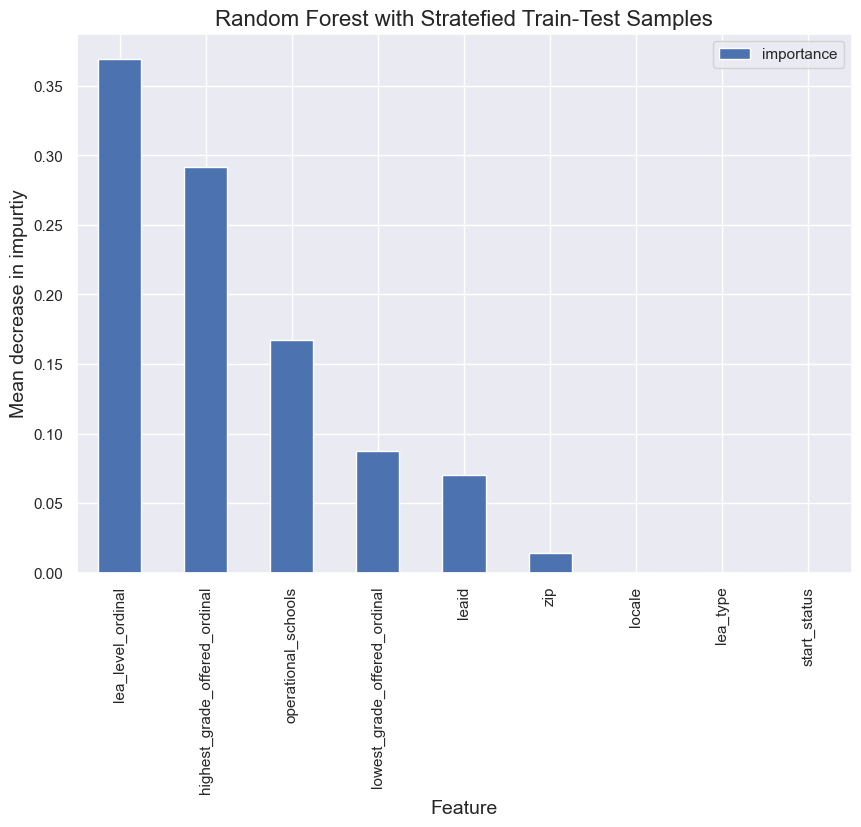

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

feat_imps = pd.DataFrame({'importance': model_rf.feature_importances_}, index=x.columns)
feat_imps.sort_values(by='importance', ascending=False, inplace=True)

feat_imps.plot(kind='bar', figsize=(10,7))

plt.title('Random Forest with Stratefied Train-Test Samples', fontsize= 16)
plt.ylabel('Mean decrease in impurtiy', fontsize = 14)
plt.xlabel('Feature', fontsize=14)
plt.legend()
plt.show()

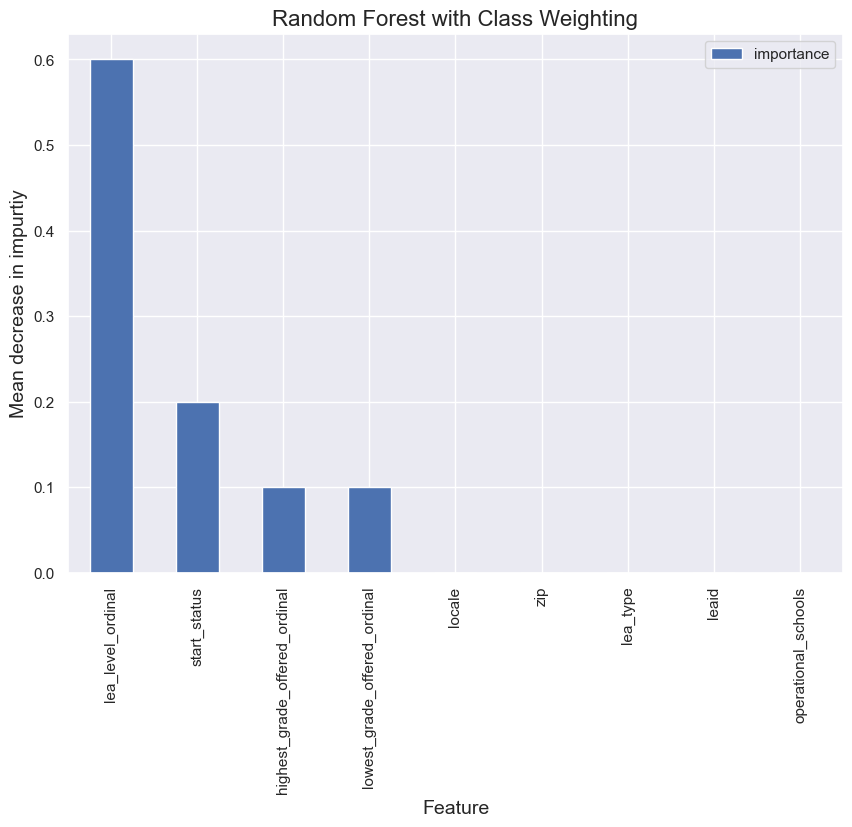

In [83]:
sns.set()

feat_imps = pd.DataFrame({'importance': model_rc.feature_importances_}, index=x.columns)
feat_imps.sort_values(by='importance', ascending=False, inplace=True)
feat_imps.plot(kind='bar', figsize=(10,7))


plt.title('Random Forest with Class Weighting', fontsize= 16)
plt.ylabel('Mean decrease in impurtiy', fontsize = 14)
plt.xlabel('Feature', fontsize=14)
plt.legend()
plt.show()

In [ ]:
y# This approach adjusts the weights inversely proportional to class frequencies, helping to mitigate the impact of imbalance.
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# Assuming X and y are your features and target variables
# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# model = LogisticRegression(class_weight=class_weights_dict)
# model.fit(X, y)